<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/SVC_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


In [80]:
df = pd.read_csv("cleaned_merged_heart_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [82]:
df.fillna(df.mean(), inplace=True)  # Fills missing values with column mean

In [83]:
df = df.drop(columns=["thal"]) #here we drop the feature that we are not working with

In [84]:
X = df.iloc[: , :-1].values #if we run this model by the 'Cardiovascular_Disease_Dataset.csv' dataset than the X will be (df.iloc[:, 1:-1])
Y = df.iloc[: , -1].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn import svm
model = svm.SVC(probability= True)  # Linear kernel SVM
model.fit(X_train, y_train)

SVC(probability=True)

In [102]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8783


In [90]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")


Precision: 0.8529


In [91]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 0.9158


In [92]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.8832


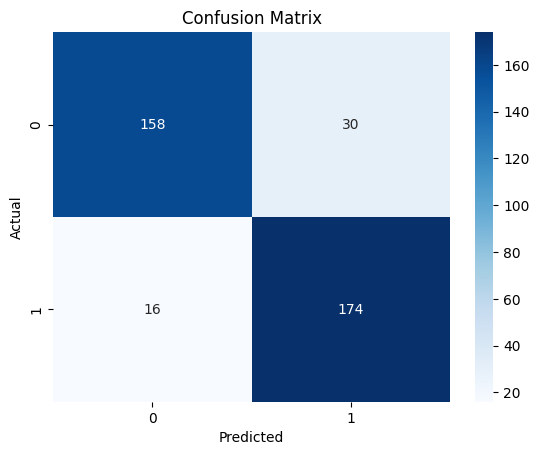

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [94]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       188
           1       0.85      0.92      0.88       190

    accuracy                           0.88       378
   macro avg       0.88      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378



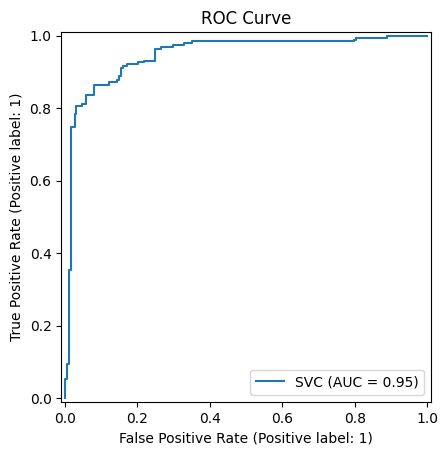

In [96]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [104]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-Fold CV
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Cross-Validation Accuracy: 0.8636 ± 0.0164


In [105]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


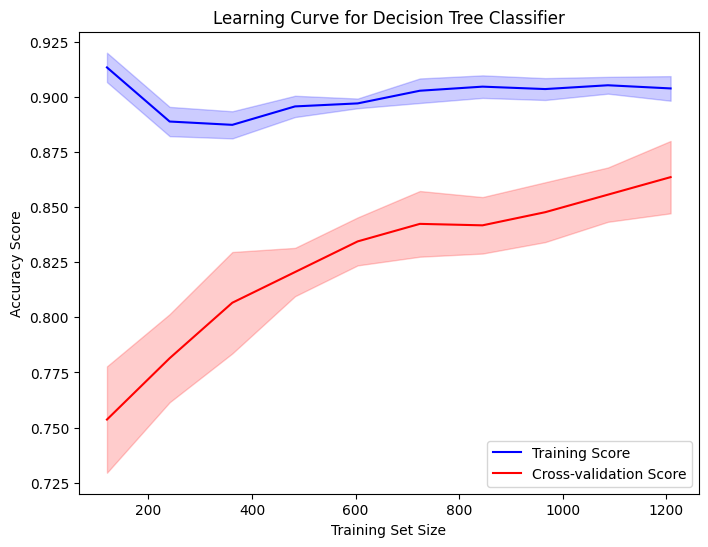

In [106]:
plt.figure(figsize=(8,6))

# Plot training curve
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Plot validation curve
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.legend()
plt.show()


In [107]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)  # This line was causing the error
val_mean = np.mean(test_scores, axis=1)  # Use 'test_scores' instead which is already calculated

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [0.91333333 0.88879668 0.88729282 0.89565217 0.89701987 0.90276243
 0.90461538 0.90351967 0.90524379 0.90380795]
Validation Scores: [0.75364238 0.78145695 0.80662252 0.8205298  0.83443709 0.84238411
 0.84172185 0.84768212 0.85562914 0.86357616]
Model is performing well (good fit).
